# Julia Hype + OnlineStats.jl

<img width="200px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Julia_prog_language.svg/1280px-Julia_prog_language.svg.png">

<img src="https://user-images.githubusercontent.com/8075494/46229806-d55a9800-c334-11e8-8616-e4e27e58d66d.gif" width=500>

---

# First: Why do I think Julia is great?

### [Sapir-Worf Hypothesis](https://en.wikipedia.org/wiki/Linguistic_relativity)

- Your language influences/determines how you think
- How you solve problems is influenced by your tools
    - e.g. avoid loops in R/Python

**I claim: Julia is less restrictive in how you solve problems**

<div class="alert alert-info">
<b>NOTE:</b> However, I highly encourage approaching problems with multiple dispatch in mind.
</div>

### Multiple Dispatch Via Example

Newton's method for finding the root of a function, i.e. where $f(\theta) = 0$:

$$
\theta_{t+1} = \theta_t - \frac{F(\theta_t)}{F'(\theta_t)}
$$

Suppose I want to use Newton's method to find the quantiles of various probability distributions.
- I to find $\theta$ such that $F(\theta) = q$ for cumulative distribution function $F$ and quantile $0<q<1$.
- We need:
    1. A way to initialize the estimate: `mean`
    2. A way to evaluate the cumulative distribution function: `cdf`
    3. A way to evaluate the derivative (probability density function): `pdf`

In [1]:
using Distributions

function my_quantile(d, q)
    θ = mean(d)
    for i in 1:20
        θ -= (cdf(d, θ) - q) / pdf(d, θ)
    end
    θ
end

my_quantile (generic function with 1 method)

<div class="alert alert-info">
<b>NOTE:</b> In R/Python, I would need to write a new function for each distribution!
</div>

In [2]:
using Interact, StatsPlots

@manipulate for d in [Normal(), Uniform(), Gamma(5,3), Beta(6,3), Exponential()], q in 0.01:0.02:0.99
    plot(d)
    x, y = quantile(d, q), my_quantile(d, q)
    vline!([y], lab="My Function: $(round(y, digits=4))", line=(4, :dot))
    vline!([x], lab="True Quantile: $(round(x, digits=4))", color=:black)
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18117828484156437272\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11073260185214420047\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18117828484156437272\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["d"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered"))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "Normal{Float64}(μ=0.0, σ=1.0)","val" => 1,"id" => "idU0o0PfxL"), OrderedDict{String,Any}("key" => "Uniform{Float64}(a=0.0, b=1.0)","val" => 2,"id" => "id8Ql0GwM6"), OrderedDict{String,Any}("key" => "Gamma{Float64}(α=5.0, θ=3.0)","val" => 3,"id" => "idNizY7wo1"), OrderedDict{String,Any}("key" => "Beta{Float64}(α=6.0, β=3.0)","val" => 4,"id" => "id2A8PMfBU"), OrderedDict{String,Any}("key" => "Exponential{Float64}(θ=1.0)","val" => 5,"id" => "id84dw28cp")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/joshday/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/joshday/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/joshday/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/joshday/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/joshday/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001267eed10, Task (runnable) @0x00000001267eed10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                 

### Other Things That Should Get You To Try Julia

- **Multi-threading**
    - First add `export JULIA_NUM_THREADS=4` to your `.bash_profile`

In [3]:
Threads.@threads for i = 1:10
    println("i = $i on thread $(Threads.threadid())")
end

i = 9 on thread 4
i = 1 on thread 1
i = 10 on thread 4
i = 2 on thread 1
i = 4 on thread 2
i = 3 on thread 1
i = 7 on thread 3
i = 5 on thread 2
i = 8 on thread 3
i = 6 on thread 2


- **Generators** (lazily map/filter a collection)

In [4]:
x = randn(10^7)

g = (xi^2 for xi in x if xi > 0)

mean(g)

0.9997738515943755

- **Automatic Differentiation**
    - If you're into the deep learning thing

In [5]:
using Zygote

thing(x) = 5x + 3

thing(10), thing'(10)

(53, 5)

- **Machine Learning**

In [6]:
using MLJ
models()

Dict{Any,Any} with 9 entries:
  "MultivariateStats" => Any["RidgeRegressor", "PCA"]
  "MLJ"               => Any["ConstantClassifier", "Standardizer", "SimpleRidge…
  "DecisionTree"      => Any["DecisionTreeRegressor", "DecisionTreeClassifier"]
  "ScikitLearn"       => Any["SVMLRegressor", "SVMNuClassifier", "ElasticNet", …
  "LIBSVM"            => Any["EpsilonSVR", "LinearSVC", "NuSVR", "NuSVC", "SVC"…
  "Clustering"        => Any["KMeans", "KMedoids"]
  "GLM"               => Any["OLSRegressor", "GLMCountRegressor"]
  "NaiveBayes"        => Any["GaussianNBClassifier", "MultinomialNBClassifier"]
  "XGBoost"           => Any["XGBoostCount", "XGBoostRegressor", "XGBoostClassi…

---

<img src="https://user-images.githubusercontent.com/8075494/57313750-3d890d80-70be-11e9-99c9-b3fe0de6ea81.png" align="center" width=500>

# What is OnlineStats?

**OnlineStats calculates statistics, models, and big data visualizations via online algorithms.**

- Well suited for streaming data or when data is too large to hold in memory.
- Processes observations one by one and all algorithms use O(1) memory.

# Overview

### Fit one observation at a time

In [26]:
using OnlineStats

o = Mean()

fit!(o, 0)

Mean: n=1 | value=0.0

### Use type system to identify when to iterate

`Mean <: OnlineStat{Number}`

- `fit!(o, 1)` -> fit directly
- `fit!(o, 1:10)` -> iterate through and `fit!` each element

In [27]:
fit!(o, (xi^2 for xi in rand(5)))

Mean: n=6 | value=0.163522

### Distributed Parallelism

- Most stats can also be merged together.

<img src="https://user-images.githubusercontent.com/8075494/57345083-95079780-7117-11e9-81bf-71b0469f04c7.png" align="center" width=300>

In [9]:
using Distributed
nprocs() == 1 && addprocs(3)
@everywhere using OnlineStats

@distributed merge for i in 1:3
    @show myid()
    fit!(Mean(), randn(10_000))
end

      From worker 2:	myid() = 2
      From worker 4:	myid() = 4
      From worker 3:	myid() = 3


Mean: n=30000 | value=-0.00617704

<div class="alert alert-info">
    <b>NOTE:</b> <code>@threads</code> uses shared memory and <code>@distributed</code> does not
</div>

### Fit Multiple Statistics on the Same Variable

In [10]:
o = Series(Mean(), Variance())

fit!(o, randn(100))

Series
  ├── Mean: n=100 | value=-0.0768325
  └── Variance: n=100 | value=0.931412

### Fit Multiple Statistics on Different Variables

In [11]:
o = Group(Mean(), Mean())

fit!(o, eachrow(randn(100, 2)))

Group
  ├── Mean: n=100 | value=-0.126167
  └── Mean: n=100 | value=0.0691087

In [12]:
fit!(2Mean(), eachrow(randn(100, 2)))

Group
  ├── Mean: n=100 | value=0.0841227
  └── Mean: n=100 | value=-0.118384

### Plot Things

- Many of types have plot recipes for easy data viz.

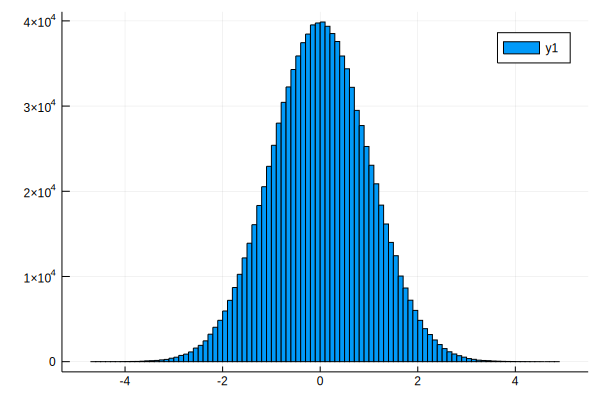

In [13]:
o = Hist(-5:.1:5)

fit!(o, randn(10^6))

plot(o)

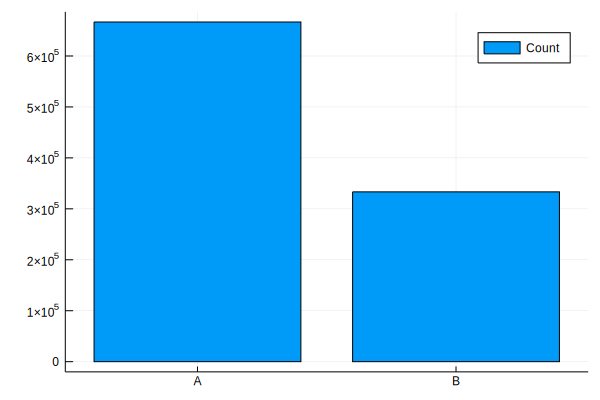

In [14]:
o = CountMap(String)

fit!(o, rand(["A", "A", "B"], 10^6))

plot(o)

#### `Partition` shows a statistic indexed by observation order

In [15]:
using Random

@manipulate for b in slider(5:5:200, value=5)
    Random.seed!(123)
    o = Partition(Mean(), b)
    fit!(o, cumsum(randn(10^6)))
    plot(o, xlab="Nobs")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 40,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/joshday/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/joshday/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/joshday/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/joshday/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/joshday/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000126585b10, Task (runnable) @0x0000000126585b10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"5\",\"10\",\"15\",\"20\",\"25\",\"30\",\"35\",\"40\",\"45\",\"50\",\"55\",\"60\",\"65\",\"70\",\"75\",\"80\",\"85\",\"90\",\"95\",\"100\",\"105\",\"110\",\"115\",\"120\",\"125\",\"130\",\"135\",\"140\",\"145\",\"150\",\"155\",\"160\",\

#### `IndexedPartition` shows a statistic indexed by another variable

In [16]:
@gif for b in 5:2:100
    Random.seed!(123)
    o = IndexedPartition(Float64, Hist(-10:.5:10), b)
    x = randn(10^6)
    y = x .+ randn(10^6)
    fit!(o, zip(x, y))
    plot(o, title="Partition Size: $b", color=:blues)
end

┌ Info: Saved animation to 
│   fn = /Users/joshday/github/Talks/2019/OnlineStats_JuliaMeetup/tmp.gif
└ @ Plots /Users/joshday/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/Users/joshday/github/Talks/2019/OnlineStats_JuliaMeetup/tmp.gif")

### Do Machine Learning

In [17]:
using LossFunctions, PenaltyFunctions

x = randn(10^6, 5)
y = x * (1:5) + randn(10^6)
data = zip(eachrow(x), y)

fit!(LinReg(), data)

LinReg: n=1000000 | value=[0.999451, 1.99994, 3.00037, 3.9993, 5.00019]

- `StatLearn` lets you put together just about any: 
    - [`LossFunction`](https://github.com/JuliaML/LossFunctions.jl) 
    - [`PenaltyFunction`](https://github.com/JuliaML/PenaltyFunctions.jl) 
    - Stochastic Approximation algorithm

In [18]:
union(subtypes(OnlineStats.SGAlgorithm), subtypes(OnlineStats.Algorithm))

10-element Array{Any,1}:
 ADADELTA               
 ADAGRAD                
 ADAM                   
 ADAMAX                 
 RMSPROP                
 SGD                    
 MSPI                   
 OMAP                   
 OMAS                   
 OnlineStats.SGAlgorithm

In [19]:
o = StatLearn(5, SGD())
coef(fit!(o, data))

5-element Array{Float64,1}:
 0.9995693671399458
 1.9984076816366332
 3.008250652349699 
 4.000504293428595 
 4.998185779633273 

In [20]:
o = StatLearn(5, MSPI(), .5ones(5), L2Penalty())

coef(fit!(o, data))

5-element Array{Float64,1}:
 0.6705075202665447
 1.3705293170857202
 2.0175111634835363
 2.6641441823562024
 3.351186646617901 

---

# Real Data Example

<div class="alert alert-info">
<b>NOTE:</b> OnlineStats doesn't care about where your data comes from (it doesn't need to).
</div>

### Statistics Directly from CSV

- For this example, we are looking at the trip data for every yellow taxi in NYC during December 2018.
- https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

#### 1) Register data with DataDeps.jl (Optional)

- Super helpful for reproducibility
- Downloads data only if you don't already have it

In [21]:
using DataDeps

register(DataDep(
    "nyc-taxi", 
    "About to download ~700MB",
    "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-12.csv"
))

path = datadep"nyc-taxi/yellow_tripdata_2018-12.csv"

"/Users/joshday/.julia/datadeps/nyc-taxi/yellow_tripdata_2018-12.csv"

#### 2) Quick inspection of file

In [22]:
;head $path

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount

1,2018-12-01 00:28:22,2018-12-01 00:44:07,2,2.50,1,N,148,234,1,12,0.5,0.5,3.95,0,0.3,17.25
1,2018-12-01 00:52:29,2018-12-01 01:11:37,3,2.30,1,N,170,144,1,13,0.5,0.5,2.85,0,0.3,17.15
2,2018-12-01 00:12:52,2018-12-01 00:36:23,1,.00,1,N,113,193,2,2.5,0.5,0.5,0,0,0.3,3.8
1,2018-12-01 00:35:08,2018-12-01 00:43:11,1,3.90,1,N,95,92,1,12.5,0.5,0.5,2.75,0,0.3,16.55
1,2018-12-01 00:21:54,2018-12-01 01:15:13,1,12.80,1,N,163,228,1,45,0.5,0.5,9.25,0,0.3,55.55
1,2018-12-01 00:00:38,2018-12-01 00:29:26,1,18.80,1,N,132,97,1,50.5,0.5,0.5,10.35,0,0.3,62.15
1,2018-12-01 00:59:39,2018-12-01 01:09:07,1,1.00,1,N,246,164,1,7.5,0.5,0.5,0.44,0,0.3,9.24
1,2018-12-01 00:19:19,2018-12-01 00:22:19,1,.30,1,N,161,163,4,4,0.5,0.5,0,0,0.3,5.3


#### 3) Iterate through rows

- Lazily read the data and parse it into the data type we want (`Int`)
- Add each value to our `CountMap`

<div class="alert alert-info">
<b>NOTE:</b> These packages don't know about each other.  One of the great things about Julia is composability.
</div>

In [30]:
using Plots, OnlineStats, CSV, Parsers

o = CountMap(Int)

function f()
    for row in CSV.Rows(path; reusebuffer=true, skipto=3)
        fit!(o, Parsers.parse(Int, row.passenger_count))
    end
end
@time f()

  4.940100 seconds (34.97 M allocations: 1.333 GiB, 15.77% gc time)


**Note this is faster than loading the entire dataset**

In [29]:
using DataFrames

@time df = CSV.read(path, skipto=3)

first(df, 5)

 10.245334 seconds (3.57 M allocations: 300.681 MiB, 17.75% gc time)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance
,Int64,String,String,Int64,Float64
1,1,2018-12-01 00:28:22,2018-12-01 00:44:07,2,2.5
2,1,2018-12-01 00:52:29,2018-12-01 01:11:37,3,2.3
3,2,2018-12-01 00:12:52,2018-12-01 00:36:23,1,0.0
4,1,2018-12-01 00:35:08,2018-12-01 00:43:11,1,3.9
5,1,2018-12-01 00:21:54,2018-12-01 01:15:13,1,12.8


#### 4) Plot

Total Number of Yellow Taxi Rides in Dec 2018: 8173231


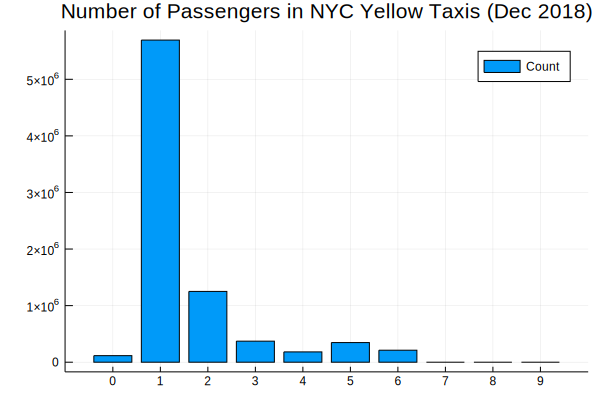

In [25]:
sort!(o.value)
println("Total Number of Yellow Taxi Rides in Dec 2018: $(nobs(o))")
plot(o, title="Number of Passengers in NYC Yellow Taxis (Dec 2018)")

In [31]:
o = HeatMap(-5:.1:5, -5:.1:5)

fit!(o, eachrow(randn(10^6, 2)))

HeatMap: n=1000000 | value=(x = -5.0:0.1:5.0, y = -5.0:0.1:5.0, z = [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

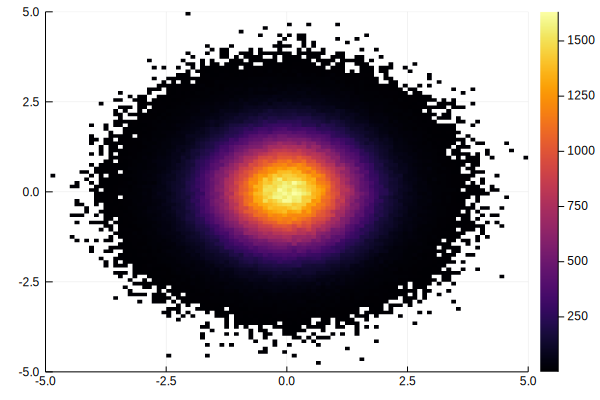

In [32]:
plot(o)

# Thanks!

## Questions/Comments/Concerns

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>